# Student Marks Prediction with Linear Regression
### Task 1 - To Explore Supervised Machine Learning

In this regression task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. We use the data available at http://bit.ly/w-data.

At the end, we will answer the question: What will be predicted score if a student studied for 9.25 hours?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
print('Shape of the dataset is: ', data.shape)
data.head()

Shape of the dataset is:  (25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Preparation

__*Step 1:*__ Let's check for missing values.

In [3]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no missing values in the dataset. Therefore, we needn't worry about imputation.

__*Step 2:*__ Let's create a NumPy array *X* that contains our explanatory variable, i.e. *Hours*. And another NumPy array *y* that contains our response variable, i.e. *Scores*.

In [4]:
X = data.iloc[:, :1].values
y = data.iloc[:, 1].values

__*Step 3:*__ We are now going to split the data into training and test sets. We are going to use 80% of the data for training and the remaining 20% for testing.

In [5]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 60)

### Visualising the Data

Now, let's take a look at the data graphically.

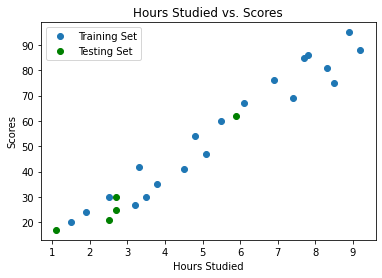

In [6]:
plt.plot(X_train, y_train, 'o', label = 'Training Set')
plt.plot(X_test, y_test, 'go', label = 'Testing Set')
plt.legend()
plt.title('Hours Studied vs. Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

We can observe a positive linear relationship between our explanatory variable and response variable. Therefore, a Linear Regression model is suitable.

## Linear Regression

We are going to create two linear regression models. We will create one from scratch, and another using scikit-learn's `sklearn.linear_model.LinearRegression()`.

### Training the Algorithm

### *__Part 1: Linear Regression from Scratch__*

Alright, so let's get started with the most exciting part of the task!

As we already know, linear regression attempts to model the relationship between a response variable (dependent variable) and one or more explanatory variables (independent variables) using a _straight line_ that best fits our data points.

And we also already know that a line can be represented as **`y = mx + b`**, where m is the slope of the line and b is the y-intercept.

Digging deeper into the math and statistics of regression lines, we know, for a regression line:

$$m = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$b = \bar{y} - m\bar{x}$$

where, $$\bar{x} = \frac{\sum_{i=1}^n x_i}{n}$$ and $$\bar{y} = \frac{\sum_{i=1}^n y_i}{n}$$

Therefore, we simply need to calculate the above constants to find our regression line.

In [7]:
def mean(list):
    return float(sum(list))/len(list)

def slope(X_train, y_train, X_mean, y_mean):
    return sum((X_train - X_mean) * (y_train - y_mean))/sum((X_train - X_mean) ** 2)

def intercept(X_mean, y_mean, m):
    return y_mean - m * X_mean

In [8]:
X_mean = mean(X_train)
y_mean = mean(y_train)
m = slope(X_train[:, 0], y_train, X_mean, y_mean)
b = intercept(X_mean, y_mean, m)
print('Slope, m: ', m)
print('Intercept, b: ', b)

Slope, m:  9.691039626389712
Intercept, b:  3.105461262328788


Now, let's take a look at the regression graph.

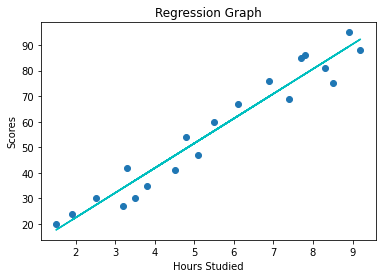

In [9]:
# Plotting the regression line
plt.plot(X_train, X_train * m + b, 'c-')

# Plotting the data points from training set
plt.plot(X_train, y_train, 'o')
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

### *__Part 2: Linear Regression using scikit-learn__*

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print ("Slope: ", regressor.coef_[0])
print ("Intercept: ", regressor.intercept_)

Slope:  9.691039626389712
Intercept:  3.105461262328788


Now, let's take a look at the regression graph.

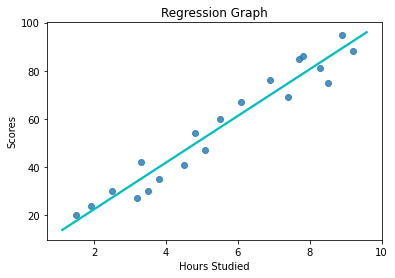

In [11]:
sns.regplot(X_train, y_train, ci = None, line_kws={'color':'c'})
plt.title('Regression Graph')
plt.xlabel('Hours Studied')
plt.ylabel('Scores')
plt.show()

In [12]:
print('The error between slope of our model and scikit-learn\'s model: ', abs(regressor.coef_[0] - m))
print('The error between intercept of our model and scikit-learn\'s model: ', abs(regressor.intercept_ - b))

The error between slope of our model and scikit-learn's model:  0.0
The error between intercept of our model and scikit-learn's model:  0.0


**We can see that the slope and intercept for both our linear regression models is the same. Therefore, we have been successful in creating a linear regression model from scratch!**

### Making Predictions

Let's now test our trained algorithm with the testing set.

In [13]:
# Predicting using our model
#y_pred = []
#for x in X_test[:, 0]:
#    y_pred.append(m * x + b)
#y_pred

# Predicting using scikit-learn's model
y_pred = regressor.predict(X_test)

In [14]:
df = pd.DataFrame({'Hours': X_test[:,0], 'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Hours,Actual Score,Predicted Score
0,1.1,17,13.765605
1,2.7,30,29.271268
2,5.9,62,60.282595
3,2.5,21,27.333060
4,2.7,25,29.271268


Now, it's time to answer the question we asked before we started: *What will be predicted score if a student studied for 9.25 hours?*

In [15]:
# What will be predicted score if a student studied for 9.25 hours?

# Predicting using our model
#print('Number of hours: 9.25')
#print('Predicted score: ', m * 9.25 + b)

# Predicting using scikit-learn's model
print('Number of hours: 9.25')
print('Predicted score: ', regressor.predict([[9.25]])[0])

Number of hours: 9.25
Predicted score:  92.74757780643363


### *__Evaluating the Model__*

In [16]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Value:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.256972083783501
Root Mean Squared Error: 3.802452558191511
R2 Value: 0.944131972730691


Therefore, we can say that our model's accuracy is **94.41%**.